In [2]:
import nltk
import pandas as pd
import numpy as np
import scipy
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from scipy.sparse import hstack
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [237]:
shareq1 = pd.read_csv("Share PriceQ1.csv",encoding="ISO-8859-1" )
shareq2 = pd.read_csv("Share PriceQ2.csv", encoding="ISO-8859-1")
shareq4 = pd.read_csv("Share PriceQ4.csv", encoding="ISO-8859-1")

In [233]:
shareq1.drop(["Relevant asterisk/ footnote", "New Rank", "Notes","Reporting Company ID ","Property ID ","Primary Interval Commodity "], axis =1, inplace=True)
shareq2.drop(["Relevant asterisk/ footnote", "New Rank", "Notes","Reporting Company ID ","Property ID ","Primary Interval Commodity ","Interval Value (m-$/tonne) (Reported-meter/t)"], axis =1, inplace=True)
shareq4.drop(["Relevant asterisk/ footnote", "New Rank", "Notes","Reporting Company ID ","Property ID ","Primary Interval Commodity "], axis =1, inplace=True)


In [236]:
# shareq1.columns = ['propertyName', 'intervalIdent', "countryName", "primaryComm", "holeID","reportDate","reportingComp","stage","significantInterval", "surfaceUnder","purpose","exchg","date1","date20","marketCapRange","marketCap1", "marketCap20","Gain","within21","Rank"]
# shareq2.columns = ['propertyName', 'intervalIdent', "countryName", "primaryComm", "holeID","reportDate","reportingComp","stage","significantInterval", "surfaceUnder","purpose","exchg","date1","date20","marketCapRange","marketCap1", "marketCap20","Gain","within21","Rank"]
# shareq4.columns = ['propertyName', 'intervalIdent', "countryName", "primaryComm", "holeID","reportDate","reportingComp","stage","significantInterval", "surfaceUnder","purpose","exchg","date1","date20","marketCapRange","marketCap1", "marketCap20","Gain","within21","Rank"]

In [65]:
shareq1 = shareq1[shareq1["primaryComm"] == "Gold"]
shareq2 = shareq2[shareq2["primaryComm"] == "Gold"]
shareq4 = shareq4[shareq4["primaryComm"] == "Gold"]

Rename Columns so it will be easier to reference


In [240]:
total.columns = ['countryName', 'exchg', "purpose", "date1", "Gain","holdID","intervalIdent","marketCap1","marketCap20","marketCapRange","primaryComm","propertyName", "Rank","reportDate","reportingComp","significantInterval","stage","surfaceUnder","date20","within21"]

In [242]:
total.shape

(2304, 20)

Merge all the different tables to one table

In [234]:
total = shareq1.append([shareq2,shareq4])
total.reset_index(drop=True, inplace=True)


C:\Users\bryan_tran\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Country Name,Exchg,Exploration Purpose,From (Date -1),Gain,Hole ID,Interval Identifier,"Market Cap ($M) (From, date -1)","Market Cap ($M) (To, date + 20)",Market Cap Range,Primary Commodity,Property Name,Rank,Reported Date (mm/dd/yyyy),Reporting Company,Significant Interval? Yes/No,Stage (At Time of Ann.),Surface or Underground?,To (Date + 20),within 21 d?
0,Canada,BGM-TVX,Exploration,0.3600,148.25%,IM-17-044,866916,115.87,292.93,>100,Gold,Cariboo,2,3/28/2017,Barkerville Gold Mines Ltd.,Yes,Prefeas/Scoping,Surface,0.8800,False
1,Canada,BGM-TVX,Extension,0.3300,60.85%,IM-17-040,861104,106.23,174.08,>100,Gold,Cariboo,21,3/21/2017,Barkerville Gold Mines Ltd.,Yes,Prefeas/Scoping,Surface,0.5200,False
2,Canada,BGM-TVX,Extension,0.3400,54.28%,IM-17-027,860374,110.32,173.4,>100,Gold,Cariboo,24,3/16/2017,Barkerville Gold Mines Ltd.,Yes,Prefeas/Scoping,Surface,0.5200,False
3,China,SVM-TSX,Extension,2.8900,40.52%,ZKX0161B,806606,483.16,678.93,>100,Silver,Ying,33,1/30/2017,Silvercorp Metals Inc.,No,Operating,Underground,4.0600,False
4,China,SVM-TSX,Extension,2.8400,36.77%,ZK05S1905,801635,474.43,648.9,>100,Silver,Ying,40,1/23/2017,Silvercorp Metals Inc.,No,Operating,Underground,3.8800,False
5,Australia,BCN-ASX,Exploration,0.0100,120.16%,JD17C10,839257,13.57,29.87,>10 - 100,Gold,Jaurdi,4,1/31/2017,Beacon Minerals Limited,Yes,Target Outline,Surface,0.0200,False
6,Canada,FF-TSX,Extension,0.6100,32.95%,PC-16-306,810489,310.7,415.29,>100,Gold,Pickle Crow,51,2/3/2017,First Mining Finance Corp.,No,Reserves Development,Surface,0.8200,False
7,Canada,OSK-TSX,Extension,1.9500,32.53%,OSK-W-16-743,788673,315.67,415.01,>100,Gold,Windfall Lake,52,1/5/2017,Osisko Mining Inc.,Yes,Prefeas/Scoping,Surface,2.5800,False
8,Canada,HRT-TSX,Extension,0.2800,32.00%,WZ-17-52,847063,121.73,162.56,>100,Gold,Sugar Zone,55,2/22/2017,Harte Gold Corporation,Yes,Prefeas/Scoping,Surface,0.3700,False
9,USA,GSV-TVX,Extension,2.1800,31.79%,DS16-18,799129,482.55,635.93,>100,Gold,Railroad-Pinion,56,1/19/2017,Gold Standard Ventures Corporation,Yes,Reserves Development,Surface,2.8700,False


In [229]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484 entries, 0 to 2302
Data columns (total 20 columns):
propertyName           1484 non-null object
intervalIdent          1484 non-null object
countryName            1484 non-null object
primaryComm            1484 non-null float64
holeID                 1484 non-null object
reportDate             1484 non-null object
reportingComp          1484 non-null object
stage                  1484 non-null object
significantInterval    1484 non-null object
surfaceUnder           1484 non-null object
purpose                1484 non-null object
exchg                  1484 non-null object
date1                  1484 non-null int64
date20                 1484 non-null object
marketCapRange         1484 non-null object
marketCap1             1484 non-null object
marketCap20            1484 non-null object
Gain                   1484 non-null object
within21               1484 non-null float64
Rank                   1484 non-null object
dtypes: floa

Drop the columns with NA, change the text NA to actuall Null value

In [243]:

# total[] = total.apply(lambda x: x[i].replace('NA',"NaN"), axis = 1)
for i in (total.columns):
    total = total.dropna(subset=[i])
    if total[i][0] == object:
        total[i] = total.apply(lambda x: x[i].replace('NA',"NaN"), axis = 1)
    total = total.dropna(subset=[i])


Making the string representations of numbers actual integer values

In [244]:
total["marketCap1"] = total.apply(lambda x: (x["marketCap1"].replace(",", "")), axis = 1)
total["marketCap1"] = total.apply(lambda x: float(x["marketCap1"]), axis = 1)

total["marketCap20"] = total.apply(lambda x: (x["marketCap20"].replace(",", "")), axis = 1)
total["marketCap20"] = total.apply(lambda x: float(x["marketCap20"]), axis = 1)


### Making Gain an actual number to work with

In [245]:
total["gainPercent"] = 0

In [246]:
for i in (total.index):
    total["gainPercent"][i] = float(total["Gain"][i].replace("%", ""))

C:\Users\bryan_tran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [429]:
def sign(x):
    if x > 0:
        return "increase"
    elif x < 0:
        return "decrease"
    else:
        return "same"
total["change"] = total.apply(lambda x: sign(x["gainPercent"]), axis = 1)


In [385]:
total.head()

,countryName,exchg,purpose,date1,holdID,intervalIdent,marketCap1,marketCap20,marketCapRange,propertyName,...,stage,surfaceUnder,date20,within21,gainPercent,change,Month,Year,Weekday,Week
0,Canada,BGM-TVX,Exploration,0.36,IM-17-044,866916,115.87,292.93,>100,Cariboo,...,Prefeas/Scoping,Surface,0.88,False,148,increase,3,2017,1,13
1,Canada,BGM-TVX,Extension,0.33,IM-17-040,861104,106.23,174.08,>100,Cariboo,...,Prefeas/Scoping,Surface,0.52,False,60,increase,3,2017,1,12
2,Canada,BGM-TVX,Extension,0.34,IM-17-027,860374,110.32,173.40,>100,Cariboo,...,Prefeas/Scoping,Surface,0.52,False,54,increase,3,2017,3,11
3,Australia,BCN-ASX,Exploration,0.01,JD17C10,839257,13.57,29.87,>10 - 100,Jaurdi,...,Target Outline,Surface,0.02,False,120,increase,1,2017,1,5
4,Canada,FF-TSX,Extension,0.61,PC-16-306,810489,310.70,415.29,>100,Pickle Crow,...,Reserves Development,Surface,0.82,False,32,increase,2,2017,4,5


In [250]:
# total.drop("Gain", inplace=True,axis=1)
# total = total[total["primaryComm"] == "Gold"]
# total.drop("primaryComm", inplace=True,axis=1)


In [257]:
# total.to_csv("finalShare2.csv")

In [332]:
total.columns

Index(['countryName', 'exchg', 'purpose', 'date1', 'holdID', 'intervalIdent',
       'marketCap1', 'marketCap20', 'marketCapRange', 'propertyName', 'Rank',
       'reportDate', 'reportingComp', 'significantInterval', 'stage',
       'surfaceUnder', 'date20', 'within21', 'gainPercent', 'change', 'Month',
       'Year', 'Weekday', 'Week'],
      dtype='object')

In [459]:
total = pd.read_csv("finalShare2.csv")


In [451]:
total.drop(["Rank","marketCapRange","change"], axis = 1, inplace = True)
total['Month'] = pd.DatetimeIndex(total.reportDate).month
total['Year'] = pd.DatetimeIndex(total.reportDate).year
total['Weekday'] = pd.DatetimeIndex(total.reportDate).weekday
total['Week'] = pd.DatetimeIndex(total.reportDate).week

catColumns = ["propertyName", "intervalIdent", "countryName", "holdID", "reportingComp", "stage","surfaceUnder", "exchg", "within21"]
for x in catColumns:
    total = total.join(pd.get_dummies(total[x], drop_first=True))
total = total.join(pd.get_dummies(total["purpose"], drop_first=True, prefix="purpose"))
total.drop(["propertyName", "intervalIdent", "countryName", "holdID", "reportingComp", "stage","surfaceUnder", "exchg", "within21","purpose"], inplace=True, axis=1)

In [380]:
total["countryName"].size()

TypeError: 'int' object is not callable

In [425]:
train_X.shape

(2978, 3177)

In [432]:
train_X

<2978x3178 sparse matrix of type '<class 'numpy.int64'>'
	with 4949 stored elements in Compressed Sparse Row format>

### Building a model to figure out which feature had the most signifcant

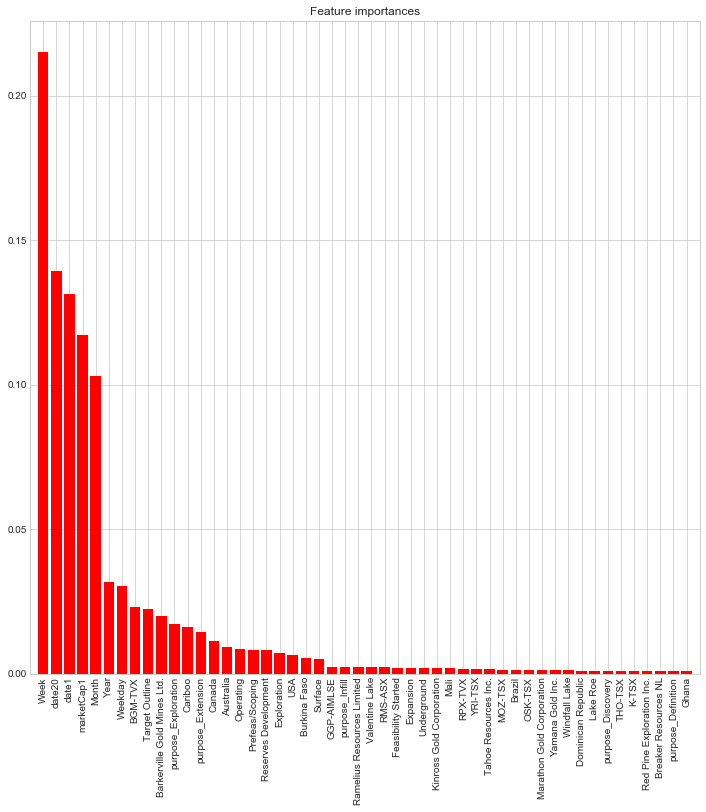

In [457]:
from sklearn import ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_X, test_x, train_y, test_y = train_test_split(total.drop(['gainPercent','reportDate','significantInterval', 'marketCap20'], axis =1), total['gainPercent'], test_size=0.2)

model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1)
model.fit(train_X, train_y)
feat_names = train_X.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:50]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

### exploring the different top features

In [ ]:
top_features = ["marketCap1","date1", "marketCap20", "date20", "exchg", "countryName", "Week", "Month","Year", "Weekday"]

In [416]:
total.groupby("Week").mean().sort_values(by="gainPercent",ascending=False)["gainPercent"].head(10)

Week
51    19.736842
1     18.000000
52    13.000000
2     12.836364
5      7.027027
3      5.311475
13     4.230769
4      3.146341
9      2.871795
11     2.285714
Name: gainPercent, dtype: float64

In [417]:
total.groupby("Month").mean().sort_values(by="gainPercent",ascending=False)["gainPercent"].head(10)

Month
1     8.796703
3     2.052239
12    1.984848
2    -4.145833
10   -6.489933
11   -9.746835
Name: gainPercent, dtype: float64

In [418]:
total.groupby("Year").mean().sort_values(by="gainPercent",ascending=False)["gainPercent"].head(10)

Year
2017    2.780435
2016   -5.113895
Name: gainPercent, dtype: float64

In [443]:
total.groupby("propertyName").mean().sort_values(by="gainPercent",ascending=False)["gainPercent"].head(10)

propertyName
Niangouela                   140.0
Silverton                    103.0
Juma East                     65.0
Chelopech                     56.0
Ernest Giles                  51.0
Gedabek                       46.0
Hyland                        38.0
Biricu                        36.0
Tanami                        34.0
Vivien, Mt Magnet, Tanami     34.0
Name: gainPercent, dtype: float64

In [444]:
total.groupby("propertyName").mean().sort_values(by="gainPercent",ascending=False)["gainPercent"].tail(10)

propertyName
Kathleen Valley        -29.000000
Snip                   -29.000000
Morning Star           -29.000000
Sleeper-Lapon Canyon   -31.000000
Kenora                 -34.000000
Fremont                -35.000000
Mutsk                  -36.333333
Suplejack              -40.000000
Rackla                 -41.000000
Yardilla               -45.000000
Name: gainPercent, dtype: float64

In [447]:
total["propertyName"].nunique()

432

In [330]:
# total.drop(["reportDate", "change"], axis=1, inplace=True)

Let's Explore your Data Set,

Load your data set and pick a type of graph
1. Load Data
2. Null Values
3. Joint Plot
4. Correlation Plot
5. Count Plot
6. Simple Linear Regression Plot
7. Box Plot
8. Distribution Plot

0. Quit

Please enter Dataframe name: 
total
Let's Explore your Data Set,

Load your data set and pick a type of graph
1. Load Data
2. Null Values
3. Joint Plot
4. Correlation Plot
5. Count Plot
6. Simple Linear Regression Plot
7. Box Plot
8. Distribution Plot

0. Quit

Please enter xaxis name: 
Please enter yaxis name: 
AxesSubplot(0.125,0.125;0.775x0.755)


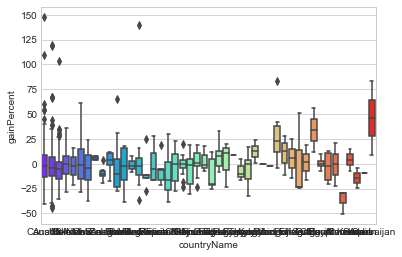

Let's Explore your Data Set,

Load your data set and pick a type of graph
1. Load Data
2. Null Values
3. Joint Plot
4. Correlation Plot
5. Count Plot
6. Simple Linear Regression Plot
7. Box Plot
8. Distribution Plot

0. Quit



In [ ]:
# Import the modules needed to run the script.
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt



data = None
# All the options

 
#Displaying all the options

def main_menu():
    os.system('clear')
    
    print ("Let's Explore your Data Set,\n")
    print ("Load your data set and pick a type of graph")
    print ("1. Load Data")
    print ("2. Null Values")
    print ("3. Joint Plot")
    print ("4. Correlation Plot")
    print ("5. Count Plot")
    print ("6. Simple Linear Regression Plot")
    print ("7. Box Plot")
    print ("8. Distribution Plot")
    print ("\n0. Quit\n")
    choice = input("Pick an option (Number)  ")
    exec_menu(choice)
    
    return
 
# Execute menu
def exec_menu(choice):
    os.system('clear')
    ch = choice.lower()
    if ch == '':
        menu_actions['main_menu']()
    else:
        try:
            menu_actions[ch]()
        except KeyError:
            print ("Invalid selection, please try again.\n")
            menu_actions['main_menu']()
    return
#Load the Data by using an existing dataframe
def inputDataHelper():
    print("Please enter Dataframe name: ")
    datainput = input(" >>  ")
    inputData(datainput)
    menu_actions['main_menu']()
def inputData(datainput):
    print(datainput)
    global data
    # I know it's bad practice to use eval. But this program is supposed to be for data scientist to 
    # use for data exploration inside their jupyter notebook. There shouldn't be a problem if they only use this 
    # program for themselves 
    data = eval(datainput)
    

#Null Values
def nullValues():
    print(sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis'))
    plt.show()
    print(data.isnull().sum())
    menu_actions['main_menu']()
    

#Seaborn Joint Plot
def jointPlotHelper():
    print("Please enter xaxis name: ")
    x = input(" >>  ")
    print("Please enter yaxis name: ")
    y = input(" >>  ")
    jointPlot(x,y)
def jointPlot(xaxis,yaxis):
    print(sns.jointplot(data = data, x=xaxis, y=yaxis))
    plt.show()
    menu_actions['main_menu']()

    
#Simple Correlation Plot
def correlationPlot():
    global data
    corr = data.corr()
    corr = corr.style.background_gradient()
#     plt.show()
    print(corr)
#     sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
#     plt.show()
    menu_actions['main_menu']()
    
def countPlotHelper():    
    print("Please enter xaxis name: ")
    x = input(" >>  ")
    countPlot(x)
def countPlot(xaxis):    
    sns.set_style('whitegrid')
    print(sns.countplot(x=xaxis,data=data,palette='RdBu_r'))
    plt.show()
    menu_actions['main_menu']()

#Simple Regression between two variables    
def simpleRegressionHelper():
    print("Please enter xaxis name: ")
    x = input(" >>  ")
    print("Please enter yaxis name: ")
    y = input(" >>  ")
    simpleRegression(x,y)
def simpleRegression(xaxis,yaxis):
    print(sns.lmplot(data = data, x=xaxis, y=yaxis))
    plt.show()
    menu_actions['main_menu']()
    
#BoxPlot of two variables
def boxPlotHelper():
    print("Please enter xaxis name: ")
    x = input(" >>  ")
    print("Please enter yaxis name: ")
    y = input(" >>  ")
    boxPlot(x,y)
def boxPlot(xaxis,yaxis):
    print(sns.boxplot(x=xaxis, y=yaxis, data=data,palette='rainbow'))
    plt.show()
    menu_actions['main_menu']()
    
#Displaying the distribution of a variable
def distPlotHelper():    
    print("Please enter xaxis name: ")
    x = input(" >>  ")
    distPlot(x)
def distPlot(xaxis):    
    sns.set_style('whitegrid')
    print(sns.distplot(data[xaxis]))
    plt.show()
    menu_actions['main_menu']()


# Back to main menu
def back():
    menu_actions['main_menu']()
    
#Close the Program
def exit():
    sys.exit()

    

menu_actions = {
    'main_menu': main_menu,
    '1': inputDataHelper,
    '2': nullValues,
    '3': jointPlotHelper,
    '4': correlationPlot,
    '5': countPlotHelper,
    '6': simpleRegressionHelper,
    '7': boxPlotHelper,
    '8': distPlotHelper,
    '9': back,
    '0': exit,
}
#Run the Program
if __name__ == "__main__":
    main_menu()

In [454]:
top_features = ["marketCap1","date1", "marketCap20", "date20", "exchg", "countryName", "Week", "Month","Year", "Weekday"]

In [455]:
model = ols("gainPercent ~ marketCap1 + date1 + marketCap20 + date20 ", total).fit()

In [456]:
model.rsquared_adj

0.11807510932061449

In [370]:
stats = pd.DataFrame(columns=['feature','r2','adj-r2','Prob (F-statistic)',' P>|t|'])

In [371]:
from statsmodels.formula.api import ols
for e in (total.columns):
    model = ols("gainPercent ~ " +e, total).fit()
    s = pd.Series([e,model.rsquared,model.rsquared_adj,model.f_pvalue,model.pvalues[0]],index=['feature','r2','adj-r2','Prob (F-statistic)',' P>|t|'])
    stats = stats.append(s, ignore_index=True)


C:\Users\bryan_tran\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\bryan_tran\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1550: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\Users\bryan_tran\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
C:\Users\bryan_tran\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\bryan_tran\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1554: Ru

In [441]:
model = ols("gainPercent ~ C(exchg)" , total).fit()
model.rsquared_adj

0.0501933740941366

In [438]:
stats.drop([18,5,10,19,11]).sort_values(by="adj-r2", ascending=False)

,feature,r2,adj-r2,Prob (F-statistic),P>|t|
12,reportingComp,4.150968e-01,5.019337e-02,8.992046e-02,3.780024e-01
1,exchg,4.150968e-01,5.019337e-02,8.992046e-02,2.314928e-01
21,Year,3.688302e-02,3.580931e-02,6.460237e-09,6.445436e-09
9,propertyName,4.981449e-01,3.497672e-02,2.201125e-01,4.044748e-02
20,Month,3.596306e-02,3.488832e-02,1.003240e-08,1.976837e-04
23,Week,3.508580e-02,3.401009e-02,1.526297e-08,4.260716e-04
0,countryName,5.992693e-02,1.033339e-02,1.675472e-01,4.062516e-01
6,marketCap1,6.947576e-03,5.840495e-03,1.241763e-02,3.408197e-01
2,purpose,1.388843e-02,5.024505e-03,1.306748e-01,4.354672e-01
13,significantInterval,6.004301e-03,3.785560e-03,6.733772e-02,2.622961e-02


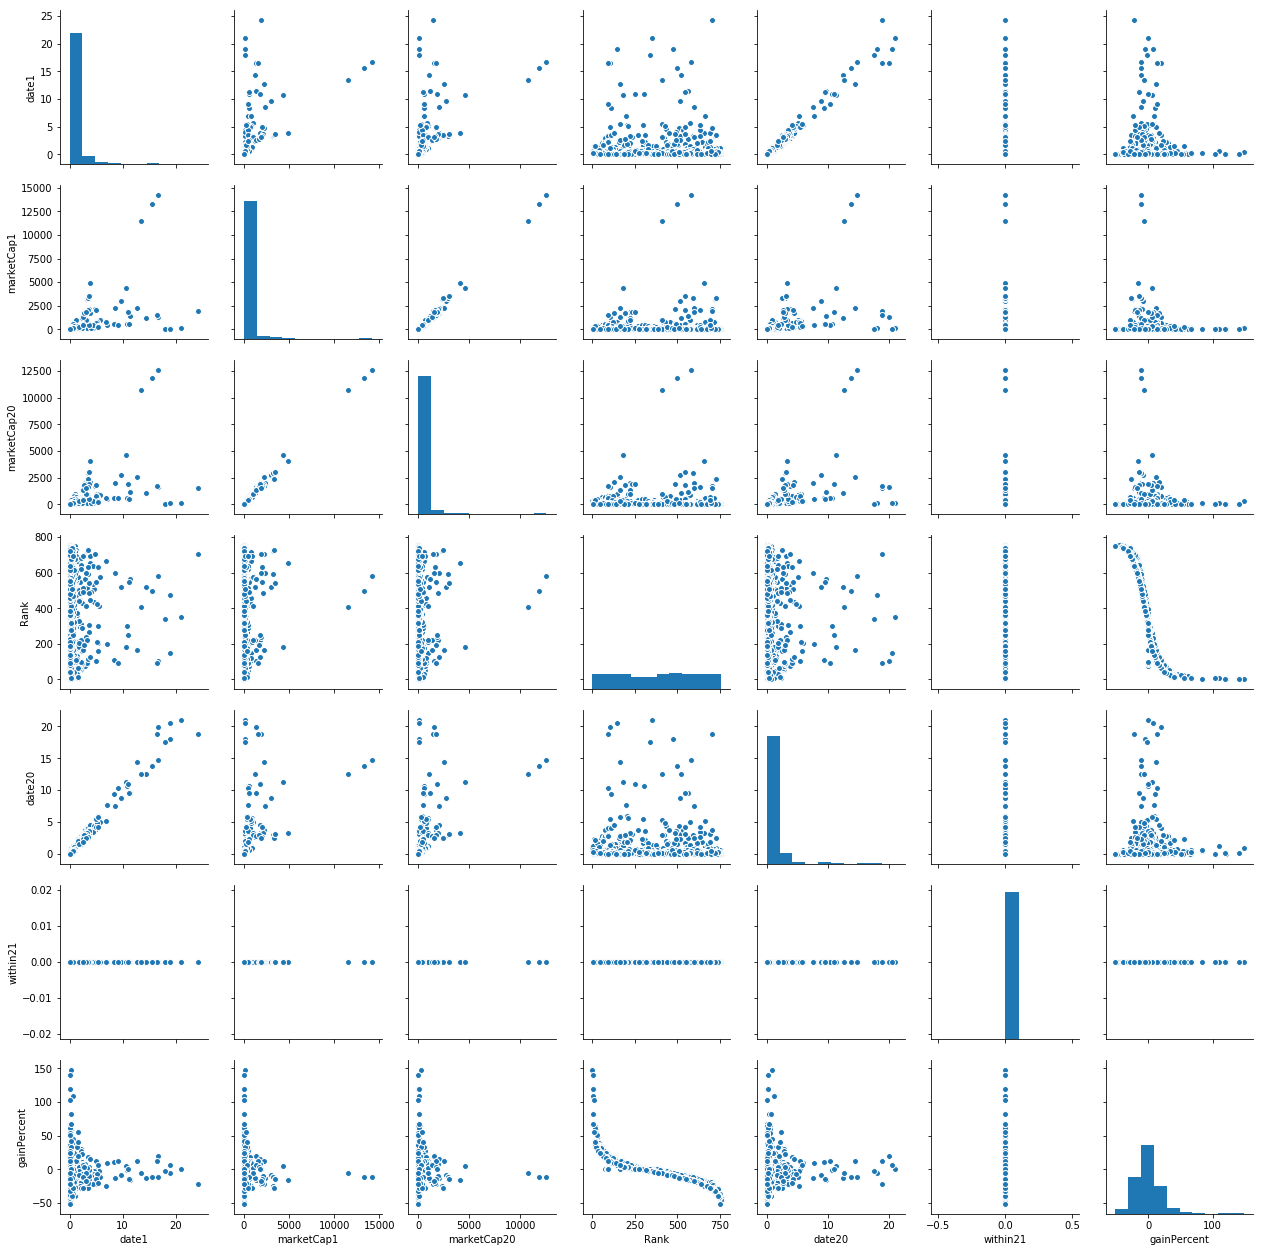

In [448]:
sns.pairplot(data=total)